<a href="https://colab.research.google.com/github/Evaristo07/Machine_Learning/blob/main/PROYECTO_04_CALDERON_CORRALES_EVARISTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Basico

Paso 1: WEB SCRAPING
* Desarrolla un Web Scraper que recopile la informacion de al menos un sitio web con la que puedas realizar un analisis y entrenar un modelo.
* La data puede venir de redes sociales, plataformas de empleos, fuentes oficiales del Estado, o cualquier sitio web siempre y cuando se respeten los terminos y condiciones del sitio.

In [6]:
!pip install snscrape
!pip install pysentimiento

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pysentimiento-0.4.2-py3-none-any.whl (30 kB)
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached datasets-1.18.4-py3-none-any.whl (312 kB)
  Using cached emoji-1.7.0-py3-none-any.whl


In [20]:
#Importamos las librerias necesarias
import snscrape.modules.twitter as sntwitter
import pandas as pd
import pysentimiento
from pysentimiento import create_analyzer
import pickle # Para Exportar
import matplotlib.pyplot as plt #Para Graficar

Paso 2: CARGA DE DATOS
* Carga los datos extraidos por el web scraper.


In [4]:
#Creamos una lista
lista = []

# Usamos TwitterSearchScraper para el scraping de tweets.
for i,tweet in enumerate(sntwitter.TwitterSearchScraper("lang:es until:2022-08-19 since:2022-01-01 -filter:links spacex").get_items()):
    lista.append([tweet.date, tweet.content, tweet.username])
    
# And finally I turn it into a dataframe.
lista = pd.DataFrame(lista, columns=['fechas', 'texto', 'usuario'])


In [10]:
lista.head()

,fechas,texto,usuario
0,2022-08-18 23:15:38+00:00,@Space_Station @SpaceX Una linda imaguen,Axel49185167
1,2022-08-18 21:45:47+00:00,@CoreDAO_BTCs @Coredao_Org @BitcoinMagazine @c...,ahmadsidi001
2,2022-08-18 21:45:28+00:00,@millye_mari si funciona con satélites de spacex,jinxed_1
3,2022-08-18 17:42:29+00:00,"@JgdTeam @Jabiertzo y otra empresa que no, lo ...",btxcgnbv
4,2022-08-18 16:38:30+00:00,@SpaceNosey @SpaceX Wow increíble,castillocorp


In [11]:
lista.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15822 entries, 0 to 15821
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   fechas   15822 non-null  datetime64[ns, UTC]
 1   texto    15822 non-null  object             
 2   usuario  15822 non-null  object             
dtypes: datetime64[ns, UTC](1), object(2)
memory usage: 371.0+ KB


* Al ejecutar tu analisis exploratorio, describe el numero de columnas y filas que encuentras.


In [12]:
#Numero de Filas y Columnas
print('El numero de filas es: ', lista.shape[0])
print('El numero de columnas es: ', lista.shape[1])

El numero de filas es:  15822
El numero de columnas es:  3


* Calcula la media, maximo, minimo y desviacion estandar de las columnas con valores numericos.


In [14]:
#calculamos la media, maximo, minimo y desviacion estandar
lista.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,fechas,texto,usuario
count,15822,15822,15822
unique,15779,15664,10315
top,2022-03-22 23:52:26+00:00,@SpaceX Ya man,SpaceNosey
freq,3,8,148
first,2022-01-01 00:30:47+00:00,NaN,NaN
last,2022-08-18 23:15:38+00:00,NaN,NaN


# 2. Intermedio

Modelo:
* Desarrolla un modelo de Machine Learning que:
  * Explique tu desicion sobre la inversion en ese sector economico.
  * Pueda ser replicado si en el futuro consideramos invertir.


In [15]:
analyzer = create_analyzer(task="sentiment", lang="es")
lista["Sentimiento"] = lista['texto'].apply(lambda x: analyzer.predict(x).output)

Downloading:   0%|          | 0.00/925 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/415M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/334 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/838k [00:00<?, ?B/s]

In [16]:
lista.head(5)

,fechas,texto,usuario,Sentimiento
0,2022-08-18 23:15:38+00:00,@Space_Station @SpaceX Una linda imaguen,Axel49185167,POS
1,2022-08-18 21:45:47+00:00,@CoreDAO_BTCs @Coredao_Org @BitcoinMagazine @c...,ahmadsidi001,NEU
2,2022-08-18 21:45:28+00:00,@millye_mari si funciona con satélites de spacex,jinxed_1,NEU
3,2022-08-18 17:42:29+00:00,"@JgdTeam @Jabiertzo y otra empresa que no, lo ...",btxcgnbv,NEG
4,2022-08-18 16:38:30+00:00,@SpaceNosey @SpaceX Wow increíble,castillocorp,POS


* Guardalo utilizando Pickle.

In [18]:
#Exportando el modelo con pickle
pickle.dump(lista, open("modelo.pkl", 'wb'))
print("El modelo se ha exportado correctamente")

El modelo se ha exportado correctamente


Exportamos en un archivo CSV.

In [19]:
#Convertimos en un archivo CSV. 
lista.to_csv('SpaceXtwitter.csv', index=False)

# 3. Avanzado

Graficas y respuesta final:
* Grafica los resultados del modelo de ML realizado.


In [22]:
lista['Sentimiento'].value_counts()

NEU    9137
NEG    3801
POS    2884
Name: Sentimiento, dtype: int64

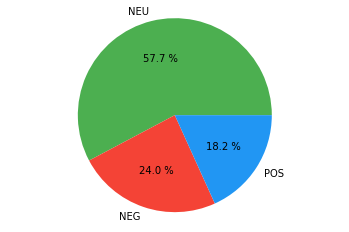

In [29]:
plt.pie(lista['Sentimiento'].value_counts(), labels = ['NEU', 'NEG', 'POS'], autopct="%0.1f %%", colors = { '#F44336','#2196f3','#4CAF50'})
plt.axis("equal")
plt.show()